# Final project: Digital Analysis of the US Presidential Debates

## General Description

Name: Koji Okumura

Object of analysis: Transcripts of the US presidential debates, which are available at https://debates.org/voter-education/debate-transcripts/

Types of analysis:
- Making a word cloud
- Making a list of frequent vocabulary in a given part-of-speech
- Sentiment analysis

Minimum necessary information is written in this notebook, and further description is here: data/project_documentation.txt

## Input of the information

Here, you copy and paste the URL of the transcript. Transcripts are available from this website: https://debates.org/voter-education/debate-transcripts/  
- If you want to analyse the final US presidential debate in 2016, for example, the URL is this: https://debates.org/voter-education/debate-transcripts/october-19-2016-debate-transcript/  
- I have confirmed that the codes below works for at least every transcript since 1996.  

In [1]:
url = input('Copy and paste the URL of the transcript here: ')

Copy and paste the URL of the transcript here: https://debates.org/voter-education/debate-transcripts/october-19-2016-debate-transcript/


Here you write in the surnames of the speakers. Please look at the transcript carefully and ensure you enter them correctly because they are essential for text cleansing.  
- If you follow the example above, please enter 'Clinton', 'Trump' and 'Wallace' in this order.  
- In case you analyse a transcript in 2000, please input 'Moderator' as a moderator's name.

In [2]:
dem_candidate = input('Write in the surname of the cadidate of the Democratic Party: ')
rep_candidate = input('Write in the surname of the cadidate of the Republican Party: ')
moderator = input('Write in the surname of the moderator: ')

Write in the surname of the cadidate of the Democratic Party: Clinton
Write in the surname of the cadidate of the Republican Party: Trump
Write in the surname of the moderator: Wallace


## Scraping

Fetch the text data from the website and write it into the text file. We use the two modules, `Requets` and `Beautiful Soup`, which are commonly used for scraping.

In [3]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [4]:
import requests

In [5]:
response = requests.get(url)
response.text[:500]

'<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">\n<html>\n<head>\n<meta http-equiv="Content-Language" content="en-us" />\n<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />\n<title>CPD: October 19, 2016 Debate Transcript</title>\n<link href="/wp-content/themes/debates2019/css/reset.css" rel="stylesheet" type="text/css" />\n<link href="/wp-content/themes/debates2019/css/jc-main.css" rel="stylesheet" type="text/css" media="screen,projection" />\n<link href="/wp-content/the'

In [6]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [7]:
import requests
from bs4 import BeautifulSoup

In [8]:
soup = BeautifulSoup(response.text, 'html.parser')

The main text is written in `<div id = 'content-sm'>`.

In [9]:
elems = soup.find('div', id = 'content-sm')

The fetched data is archived in `raw_script.txt`.

In [10]:
str_elems = str(elems)
with open('raw_script.txt', 'w', encoding = 'utf-8') as fh1:
    fh1.write(str_elems)

## Text Cleansing

Remove the HTML tags and other unnecessary information and create a new text file named `script.txt`.

In [11]:
import re
with open('raw_script.txt', 'r', encoding = 'utf-8') as fh1, open('script.txt', 'w', encoding = 'utf-8') as fh2:
    for line in fh1:
        text1 = re.sub('<.*?>', '', line)
        text2 = re.sub('\[.*?\]', '', text1)
        text3 = re.sub('\(.*?\)', '', text2)
        fh2.write(text3)

In [12]:
with open('script.txt', 'r', encoding = 'utf-8') as fh2:
    number_of_lines = len(fh2.readlines())
print(number_of_lines)

524


In [13]:
people_list = {
    'Dem': dem_candidate.upper(), # Candidate of the Democratic Party
    'Rep': rep_candidate.upper(), # Candidate of the Republican Party
    'Mod': moderator.upper() # Moderator
}
print(people_list)

{'Dem': 'CLINTON', 'Rep': 'TRUMP', 'Mod': 'WALLACE'}


Indentify a person who speaks in each line.  
- For example, a Trump's remark starts with a description of 'TRUMP: ' and lasts until another person's remark starts with 'CLINTON: ' or 'WALLACE: '.

In [14]:
line_speaker = ['' for i in range(number_of_lines)]
with open('script.txt', 'r', encoding = 'utf-8') as fh2:
    for line_counter, line in enumerate(fh2):
        if re.search(f"{people_list['Dem']}:\s", line):
            for j in range(line_counter, number_of_lines):
                line_speaker[j] = people_list['Dem']
        elif re.search(f"{people_list['Rep']}:\s", line):
            for j in range(line_counter, number_of_lines):
                line_speaker[j] = people_list['Rep']
        elif re.search(f"{people_list['Mod']}:\s", line):
            for j in range(line_counter, number_of_lines):
                line_speaker[j] = people_list['Mod']        
print(line_speaker[:50])

['', '', '', '', '', '', '', '', '', '', 'WALLACE', 'WALLACE', 'WALLACE', 'WALLACE', 'WALLACE', 'WALLACE', 'WALLACE', 'WALLACE', 'CLINTON', 'CLINTON', 'CLINTON', 'CLINTON', 'CLINTON', 'CLINTON', 'WALLACE', 'WALLACE', 'TRUMP', 'TRUMP', 'TRUMP', 'TRUMP', 'TRUMP', 'WALLACE', 'WALLACE', 'WALLACE', 'CLINTON', 'CLINTON', 'CLINTON', 'CLINTON', 'WALLACE', 'TRUMP', 'WALLACE', 'CLINTON', 'CLINTON', 'CLINTON', 'WALLACE', 'TRUMP', 'TRUMP', 'TRUMP', 'WALLACE', 'TRUMP']


Using the list of `line_speaker`, split the transcript according to who the speaker is. Three text files named `script_dem.txt`, `script_rep.txt`, and `script_mod.txt` are created. At the same time, punctuations are removed.

In [15]:
with open('script.txt', 'r', encoding = 'utf-8') as fh2, open('script_dem.txt', 'w', encoding = 'utf-8') as fh_dem, open('script_rep.txt', 'w', encoding = 'utf-8') as fh_rep, open('script_mod.txt', 'w', encoding = 'utf-8') as fh_mod:
    for line_counter, line in enumerate(fh2):

        if line_speaker[line_counter] == people_list['Dem']:
            text1 = re.sub(f"{people_list['Dem']}:\s", '', line)
            text2 = re.sub(r'[^\w\s]', '', text1)
            fh_dem.write(text2)
        elif line_speaker[line_counter] == people_list['Rep']:
            text1 = re.sub(f"{people_list['Rep']}:\s", '', line)
            text2 = re.sub(r'[^\w\s]', '', text1)
            fh_rep.write(text2) 
        elif line_speaker[line_counter] == people_list['Mod']:
            text1 = re.sub(f"{people_list['Mod']}:\s", '', line)
            text2 = re.sub(r'[^\w\s]', '', text1)
            fh_mod.write(text2)         

## Analysis 1: Word Cloud

Make word clouds using `WordCloud` and `Matplotlib` modules. The list of stop words, which we remove from word clouds, is prepared in advance. The images of word clouds of the two candidates' discourse are saved in the folder.

In [16]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [18]:
stop_words = []

with open('data/stopwords.txt', 'r', encoding = 'utf-8') as fh_stop:
    for line in fh_stop:
        line = re.sub('\n', '', line)
        stop_words.append(line)

print(stop_words[:50])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do']


In [19]:
def create_wordcloud(text_path, image_name):
    text = open(text_path, 'r', encoding = 'utf-8').read()
    wordcloud = WordCloud(width = 1280, height = 720, max_words = 200, background_color = 'white', stopwords = stop_words).generate(text)
    wordcloud.to_file(image_name)
    plt.axis('off')
    plt.imshow(wordcloud)

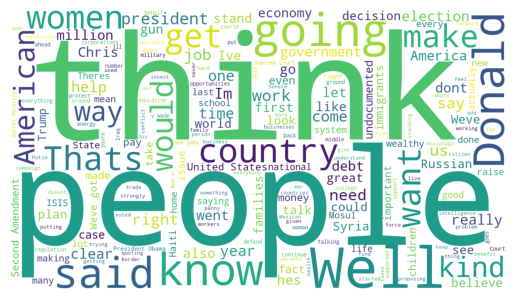

In [20]:
create_wordcloud('script_dem.txt', 'word_cloud_dem.png')

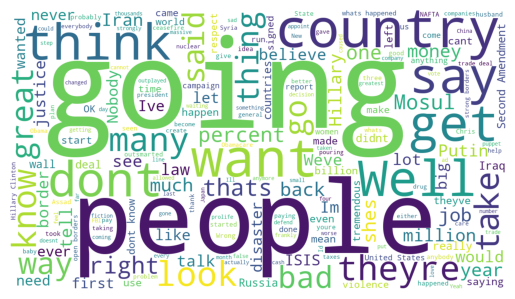

In [21]:
create_wordcloud('script_rep.txt', 'word_cloud_rep.png')

## Analysis 2: Frequent Vocabulary

Tokenization and part-of-speech (POS) tagging are carried out using the `Nltk` module to generate frequent vocabulary lists and graphs in given POS (nouns, verbs, adjectives, and adverbs).

In [22]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [23]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\okuso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\okuso\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\okuso\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\okuso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Nltk gives us detailed POS information such as 'NN' and simplifies it like 'Noun'.
- You can check what each pos tag stands for here: https://www.guru99.com/pos-tagging-chunking-nltk.html

In [24]:
def pos_change_func(old_pos):
    if old_pos.startswith('N'):
        new_pos = 'Noun'
    elif old_pos.startswith('V'):
        new_pos = 'Verb'
    elif old_pos.startswith('J'):
        new_pos = 'Adjective'
    elif old_pos.startswith('R'):
        new_pos = 'Adverb'
    else:
        new_pos = 'Other'
    return new_pos

# For example
print(pos_change_func('NN'))

Noun


In [25]:
lemmatizer = WordNetLemmatizer()

The `pos_analysis` function returns `word_count_list`, which has the following information: 1) words, 2) parts of speech, and 3) number of occurrences. The steps are like these:
- Step 1: Read text files line by line, tokenizing and POS tagging using the `Nltk` module
- Step 2: Lemmatize each token and change the POS tags
- Step 3: Count how many times each headword appears in the text

In [26]:
def pos_analysis(text_path):
    
    # Make a tagged word list
    
    tagged_word_list = []
    
    with open(text_path, 'r', encoding = 'utf-8') as fh:
        text = fh.readlines()
        for line in text:
            word = nltk.word_tokenize(line)
            tagged_word_list += nltk.pos_tag(word)

    print(f'tagged_word_list: {tagged_word_list[:3]}')
    
    # Lemmatize words and change the POS tags
    
    new_word_list = []

    for word in tagged_word_list:
        new_word_list.append((lemmatizer.lemmatize(word[0].lower()), pos_change_func(word[1])))
        
    print(f'new_word_list: {new_word_list[:3]}')
    
    # Count the frequency of words
    
    word_count_dict = {}
    word_count_list = []
    
    for word in new_word_list:
        if word in word_count_dict:
            word_count_dict[word] += 1
        else:
            word_count_dict[word] = 1
        
    for key, value in word_count_dict.items():
        word_count_list.append((key[0], key[1], value))
    
    print(f'word_count_list: {word_count_list[:3]}')
    
    return word_count_list

In [27]:
pos_analysis_dem = pos_analysis('script_dem.txt')

tagged_word_list: [('Thank', 'NNP'), ('you', 'PRP'), ('very', 'RB')]
new_word_list: [('thank', 'Noun'), ('you', 'Other'), ('very', 'Adverb')]
word_count_list: [('thank', 'Noun', 1), ('you', 'Other', 64), ('very', 'Adverb', 20)]


In [28]:
pos_analysis_rep = pos_analysis('script_rep.txt')

tagged_word_list: [('Well', 'NNP'), ('first', 'RB'), ('of', 'IN')]
new_word_list: [('well', 'Noun'), ('first', 'Adverb'), ('of', 'Other')]
word_count_list: [('well', 'Noun', 7), ('first', 'Adverb', 4), ('of', 'Other', 136)]


Here, `Pandas` and `Numpy` modules are used to handle tables skillfully. First, save the lists of all words in the discourse as csv files.

In [29]:
import pandas as pd
import numpy as np

In [30]:
def all_words_list(pos_analysis, csv_name):
    df_all_words = pd.DataFrame(pos_analysis)
    df_all_words.columns = ['Word', 'New POS', 'Frequency']
    df_all_words.sort_values('Frequency', ascending = False, inplace = True)
    df_all_words.to_csv(csv_name)
    return df_all_words

In [31]:
df_all_words_dem = all_words_list(pos_analysis_dem, 'all_words_dem.csv')
df_all_words_dem

,Word,New POS,Frequency
19,the,Other,346
7,to,Other,254
5,and,Other,213
48,that,Other,182
13,i,Other,169
...,...,...,...
726,climate,Noun,1
727,change,Noun,1
735,minimum,Noun,1
736,live,Verb,1


In [32]:
df_all_words_rep = all_words_list(pos_analysis_rep, 'all_words_rep.csv')
df_all_words_rep

,Word,New POS,Frequency
13,the,Other,247
10,and,Other,201
6,to,Other,195
2,of,Other,136
4,it,Other,134
...,...,...,...
647,catastrophically,Adverb,1
648,low,Adjective,1
649,growingour,Adjective,1
650,outand,Adverb,1


Next, focus on the POS tags and save the word list for each POS as a csv file.

In [33]:
def pos_csv(df_all_words, pos, csv_name):
    df_pos_words = df_all_words[df_all_words['New POS'] == pos]
    df_pos_words.set_index('Word', inplace = True)
    df_pos_words.to_csv(csv_name)

In [34]:
pos_csv(df_all_words_dem, 'Noun', 'df_noun_dem.csv')
pos_csv(df_all_words_dem, 'Verb', 'df_verb_dem.csv')
pos_csv(df_all_words_dem, 'Adjective', 'df_adjective_dem.csv')
pos_csv(df_all_words_dem, 'Adverb', 'df_adverb_dem.csv')

In [35]:
pos_csv(df_all_words_rep, 'Noun', 'df_noun_rep.csv')
pos_csv(df_all_words_rep, 'Verb', 'df_verb_rep.csv')
pos_csv(df_all_words_rep, 'Adjective', 'df_adjective_rep.csv')
pos_csv(df_all_words_rep, 'Adverb', 'df_adverb_rep.csv')

Finally, a graph of the frequent vocabulary for each POS is drawn. And graphs are saved in the folder.
- We use the `Matplotlib` module to make graphs.
- In the example below, the graphs are drawn for nouns that appear 15 times or more and adjectives that appear 5 times or more.

In [36]:
def pos_graph(csv_name, min_freq, png_name):
    df_input = pd.read_csv(csv_name)
    df_data = df_input.loc[df_input['Frequency'] >= min_freq, ['Word', 'Frequency']]
    df_data.sort_values('Frequency', ascending = True, inplace = True)
    df_data.set_index('Word', inplace = True)
    df_data.plot.barh()
    plt.savefig(png_name)
    plt.show()
    plt.close('all')

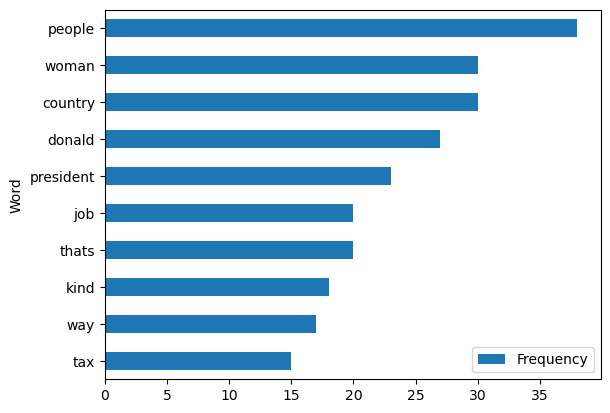

In [37]:
pos_graph('df_noun_dem.csv', 15, 'freq_noun_dem.png')

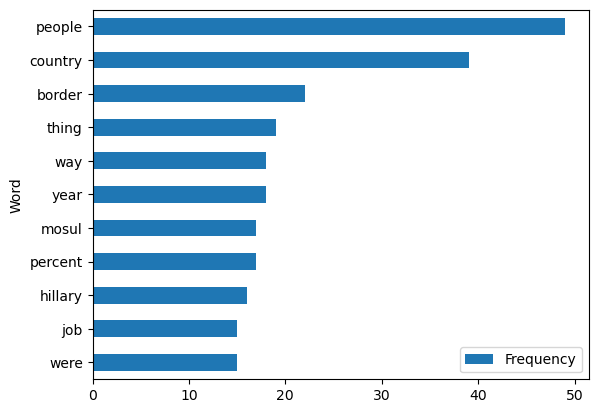

In [38]:
pos_graph('df_noun_rep.csv', 15, 'freq_noun_rep.png')

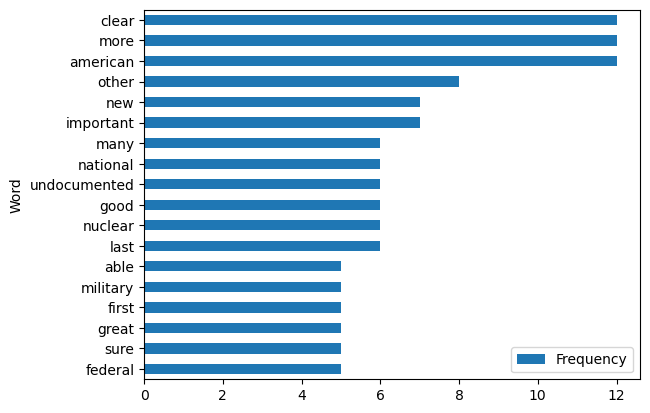

In [39]:
pos_graph('df_adjective_dem.csv', 5, 'freq_adjective_dem.png')

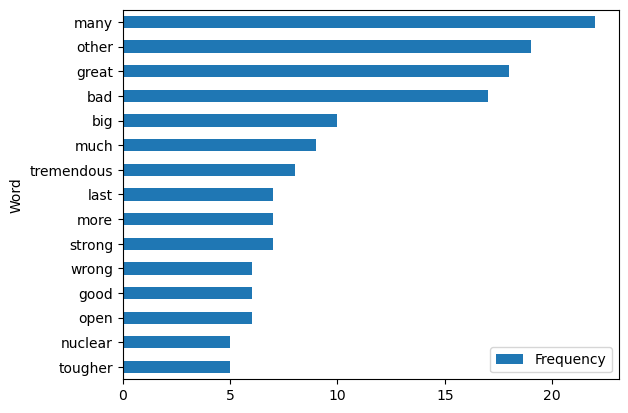

In [40]:
pos_graph('df_adjective_rep.csv', 5, 'freq_adjective_rep.png')

## Analysis 3: Sentiment Analysis

I also tried sentiment analysis using the Nltk module.  
This model evaluates the degree to which a text is positive, negative, or neutral, with a value between 0 and 1.

In [41]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\okuso\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [42]:
sia = SentimentIntensityAnalyzer()

In [43]:
def senti_analysis(text_path):
    sentiment_scores = []
    texts = open(text_path, 'r', encoding = 'utf-8').readlines()
    for line in texts:
        scores = sia.polarity_scores(line)
        sentiment_scores.append([scores['pos'], scores['neg'], scores['neu']])
    return sentiment_scores

In [44]:
senti_scores_dem = senti_analysis('script_dem.txt')
print(senti_scores_dem[:10])

[[0.351, 0.0, 0.649], [0.118, 0.0, 0.882], [0.167, 0.045, 0.788], [0.152, 0.022, 0.826], [0.154, 0.0, 0.846], [0.095, 0.0, 0.905], [0.258, 0.053, 0.689], [0.071, 0.226, 0.702], [0.044, 0.127, 0.83], [0.072, 0.109, 0.819]]


In [45]:
senti_scores_rep = senti_analysis('script_rep.txt')
print(senti_scores_rep[:10])

[[0.278, 0.0, 0.722], [0.113, 0.039, 0.847], [0.154, 0.041, 0.805], [0.132, 0.0, 0.868], [0.09, 0.0, 0.91], [0.084, 0.212, 0.704], [0.076, 0.288, 0.636], [0.302, 0.022, 0.676], [0.254, 0.0, 0.746], [0.0, 0.0, 1.0]]


Display the average value of the sentiment of each speaker. Then, graphs of the change in sentiment throughout the debate are created.
- We use `Pandas` and `Matplotlib` modules for this process.
- We use moving averages for five lines to make the graphs easier to see.

In [46]:
def senti_graph(senti_scores, roll_num, png_name):
    df_data = pd.DataFrame(senti_scores)
    df_data.columns = ['Positive', 'Negative', 'Neutral']
    
    print('---Average of each sentiment score---')
    print(df_data[['Positive', 'Negative', 'Neutral']].mean())
    
    # Caliculate Moving Averages
    df_data['Avg Positive'] = df_data['Positive'].rolling(roll_num).mean()
    df_data['Avg Negative'] = df_data['Negative'].rolling(roll_num).mean()
    df_data['Avg Neutral'] = df_data['Neutral'].rolling(roll_num).mean()
    
    new_df_data = df_data[['Avg Positive', 'Avg Negative', 'Avg Neutral']]
    new_df_data.plot()
    plt.savefig(png_name)
    plt.show()
    plt.close('all')

---Average of each sentiment score---
Positive    0.124358
Negative    0.078767
Neutral     0.796874
dtype: float64


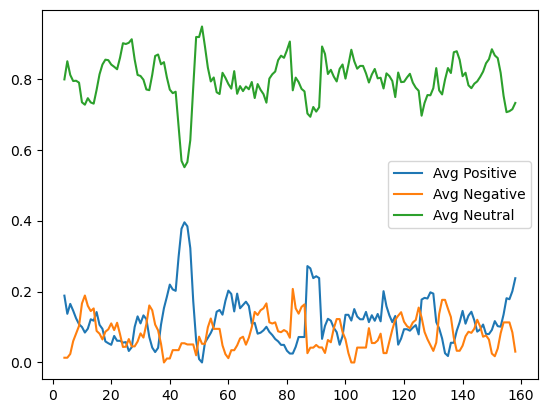

In [47]:
senti_graph(senti_scores_dem, 5, 'senti_dem.png')

---Average of each sentiment score---
Positive    0.095179
Negative    0.124841
Neutral     0.775000
dtype: float64


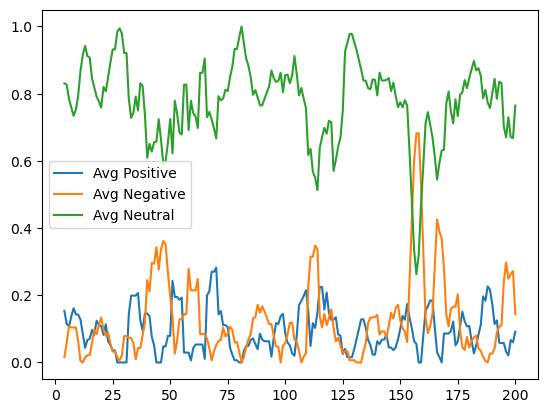

In [48]:
senti_graph(senti_scores_rep, 5, 'senti_rep.png')

The final project ends here. Thank you for seeing it through to the end!